In [1]:
#Folders of Ground truth Masks and Original Image Samples
masks = r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\verge_masks\SegmentationClass"
samples = r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg"

In [2]:
#get sample 1
import os
samp1 = os.path.join(samples,os.listdir(samples)[0])
print(samp1)

C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg


In [3]:
import matplotlib.pyplot as plt
import skimage
imp = skimage.io.imread(samp1)
print(imp.shape)

(1080, 1920, 3)


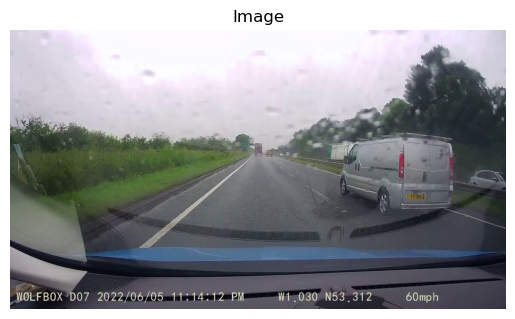

In [4]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread(samp1)
plt.title("Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [5]:
import os
import pandas as pd
#get seeds from litter locations
labelCSV = r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\Training02.csv"

centx = []
centy = []

#annotations file
df_antt = pd.read_csv(labelCSV)

xmin = df_antt["xmin"].values
ymin = df_antt["ymin"].values
xmax = df_antt["xmax"].values
ymax = df_antt["ymax"].values
width = df_antt["width"].values #width and height of IMAGES
height = df_antt["height"].values

#get normalised center points of litter
for i, name in enumerate(xmin):
    xcen = float((xmin[i] + xmax[i])) / 2 / width[i] #normalise bboxes for yolo according to image size (YOLO is in format <class> <x centroid> <y centroid> <bb width> <bb height>)
    ycen = float((ymin[i] + ymax[i])) / 2 / height[i]
    
    centx.append(xcen)
    centy.append(ycen)





Text(0.5, 1.0, 'Scatterplot of normalised training litter points')

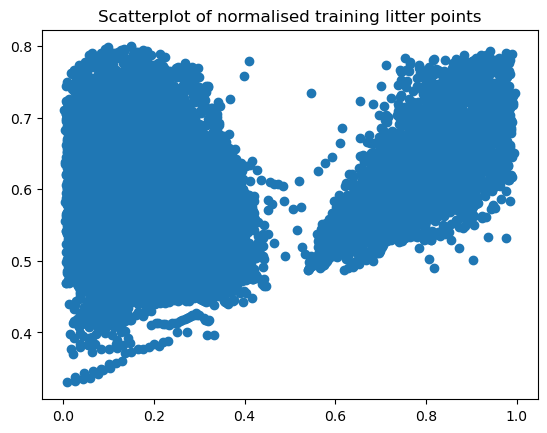

In [6]:
plt.scatter(centx,centy)
plt.title("Scatterplot of normalised training litter points")

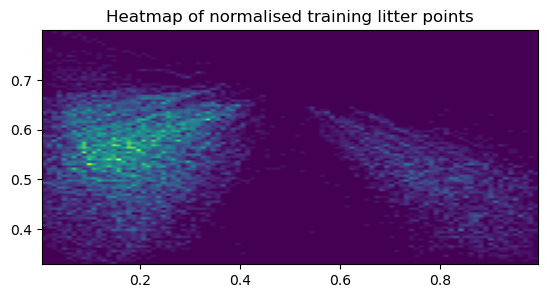

In [7]:
#plot normalised points
#plt.scatter(centx,centy)

import numpy as np
heatmap, xedges, yedges = np.histogram2d(centx, centy, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent)
plt.title("Heatmap of normalised training litter points")
plt.show()

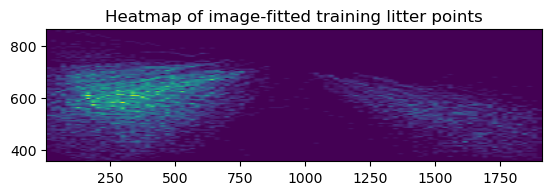

In [8]:
#Unnormalise points (1920x1080 Image)


newCentx = np.multiply(centx, 1920)
newCenty = np.multiply(centy, 1080)

heatmap, xedges, yedges = np.histogram2d(newCentx, newCenty, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T,extent = extent)
plt.title("Heatmap of image-fitted training litter points")
plt.show()


In [9]:
from sklearn.cluster import KMeans
import numpy as np
#unnormalised
points = [(centx[i], centy[i]) for i in range(0, len(centx))]

kmeans = KMeans(n_clusters=15, random_state=0).fit(points)


kCents = kmeans.cluster_centers_
x,y = zip(*kCents)

(1080, 1920, 3)


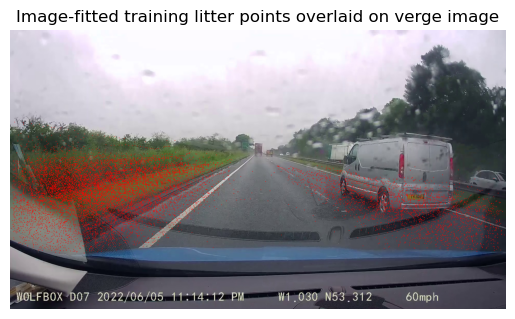

In [10]:
#plot all points
plotted_im = im.copy()
print(plotted_im.shape)

for i in range(0,len(centx)):
    cv2.circle(plotted_im, (int(centx[i]*1920),int(centy[i]*1080)), radius=1, color=(0, 0, 255), thickness=-1)

plt.axis('off')
plt.title("Image-fitted training litter points overlaid on verge image")
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'K=15 means-clustering reduced training litter points overlaid on verge image')

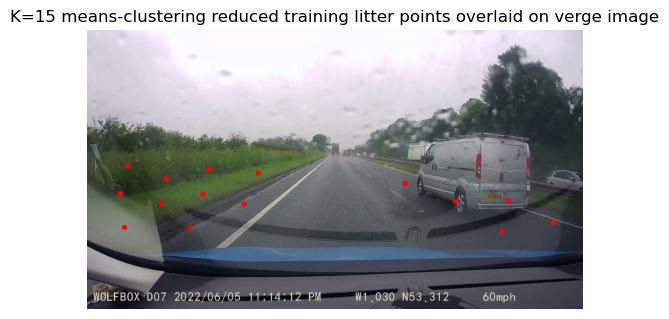

In [11]:
#plot clustered points
plotted_im = im.copy()
for i in range(0,len(x)):
    cv2.circle(plotted_im, (int(x[i]*1920),int(y[i]*1080)), radius=10, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("K=15 means-clustering reduced training litter points overlaid on verge image")

Text(0.5, 1.0, 'A single clustered training litter point overlaid on verge image')

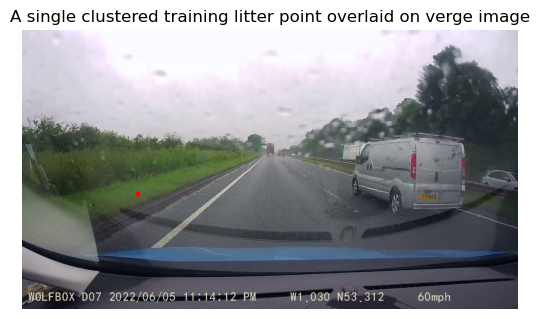

In [12]:
#plot a clustered point
plotted_im = im.copy()

cv2.circle(plotted_im, (int(x[0]*1920),int(y[0]*1080)), radius=10, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("A single clustered training litter point overlaid on verge image")

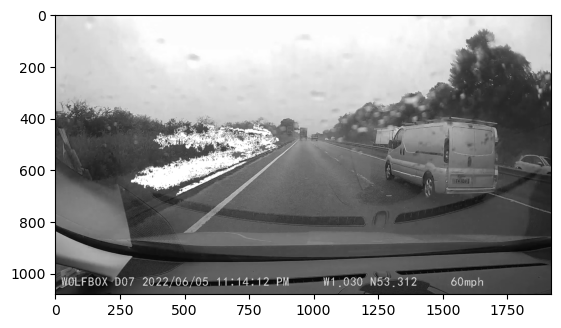

In [13]:
from skimage.segmentation import flood, flood_fill
filled = flood_fill(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY),(int(y[0]*1080),int(x[0]*1920)),255,tolerance=10)
plt.imshow(cv2.cvtColor(filled,cv2.COLOR_BGR2RGB))

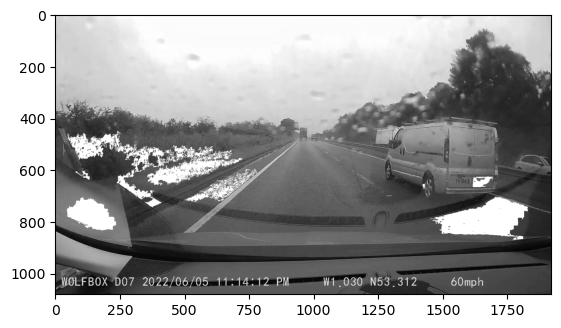

In [14]:
#Filling based on kmeans
new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

for i in range(0,len(x)):

#     try:
    new = new.copy()
    new = flood_fill(new,(int(y[i]*1080),int(x[i]*1920)),255,tolerance=5)
#     except:
#         print(int(x[i]),int(y[i]))


#rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(new,cmap = "gray")


#Print different tolerances
#Two main parameters... tolerance and value of K
#Clean up, do for all images, find sky?

#close/dilate best result...
#blend hsv segment with point segment
#put points into segment-anything model
#learn which points fit in best - k-means points to ground truth....?
#flood fill based on hsv

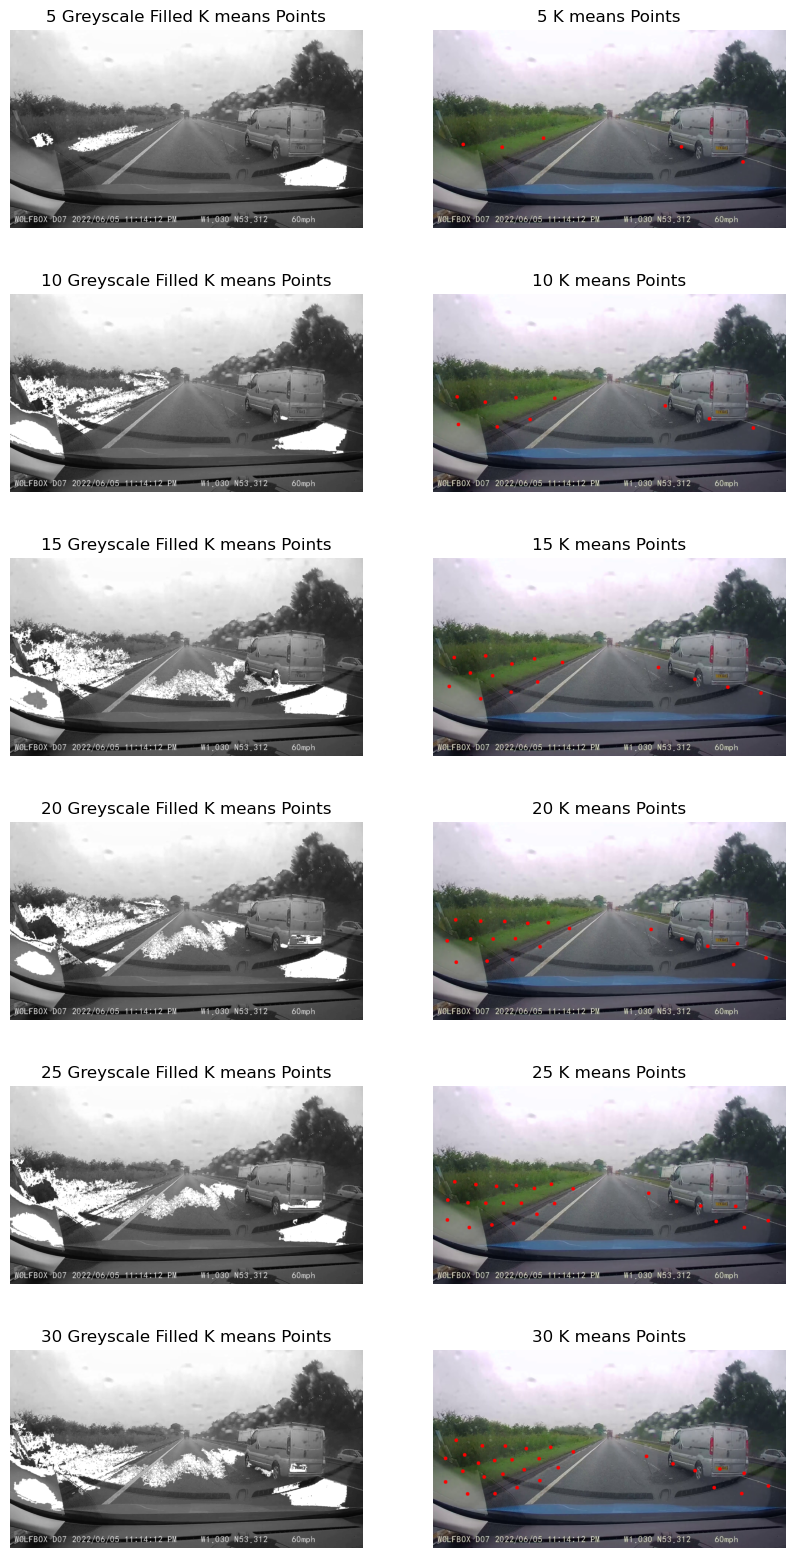

In [15]:
#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance):
    plt_counter = 1
    #get height & width of verge
    vh = im.shape[0]; vw = im.shape[1]
    for i, k in enumerate(ks): 
        points = [(centx[j]*vw, centy[j]*vh) for j in range(0, len(centx))]
        
        
        kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)
        
        #Filling based on kmeans
        new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


        for j in range(0,len(x)):
            new = new.copy()
            new = flood_fill(new,(int(y[j]),int(x[j])),255,tolerance=tolerance)
        
        

        #rotBack = cv2.rotate(new,cv2.ROTATE_90_CLOCKWISE)
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Greyscale Filled K means Points")
        plt.imshow(new,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]),int(y[j])), radius=10, color=(0, 0, 255), thickness=-1)
            #print(int(x[i]*vw),int(y[i]*vh))


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25,30],7) #k's to test followed by fill tolerance
#most accurate seems to be low k value, higher tolerance

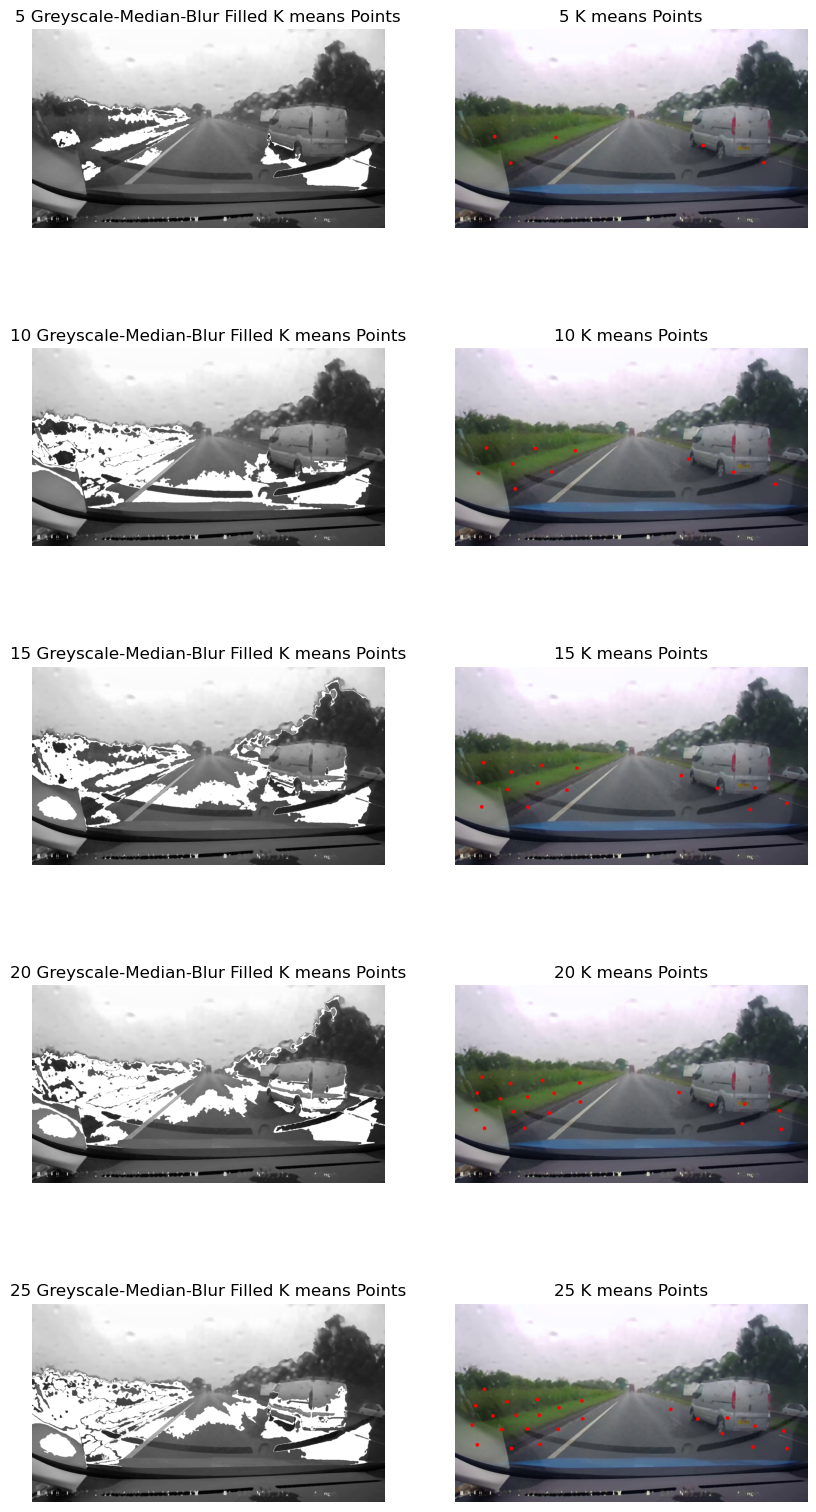

In [16]:
#with median filter

#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance,blur_val):
    plt_counter = 1
    for i, k in enumerate(ks): 
        points = [(centx[j], centy[j]) for j in range(0, len(centx))]

        kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)
        
        #Filling based on kmeans
        new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        new = cv2.medianBlur(new, blur_val)

        for j in range(0,len(x)):
            
            new = flood_fill(new,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=tolerance)
        
        
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Greyscale-Median-Blur Filled K means Points")
        plt.imshow(new,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        plotted_im = cv2.medianBlur(plotted_im, blur_val)
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25],7,11) #k's to test followed by fill tolerance & blur level(odd number)

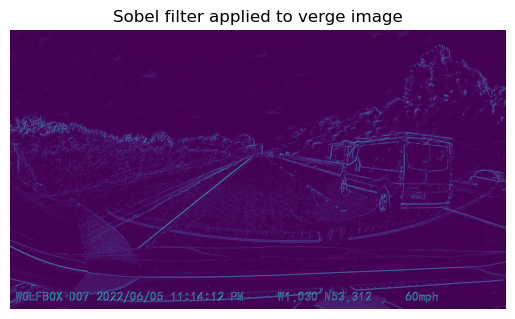

In [17]:
from skimage import filters
from skimage import feature
to_fill = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

to_fill = cv2.GaussianBlur(to_fill,(3,3), 0);

grad_x = cv2.Sobel(to_fill,cv2.CV_16U,1,0,borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(to_fill,cv2.CV_16U,0,1,borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.axis('off')
plt.title("Sobel filter applied to verge image")
plt.imshow(grad)

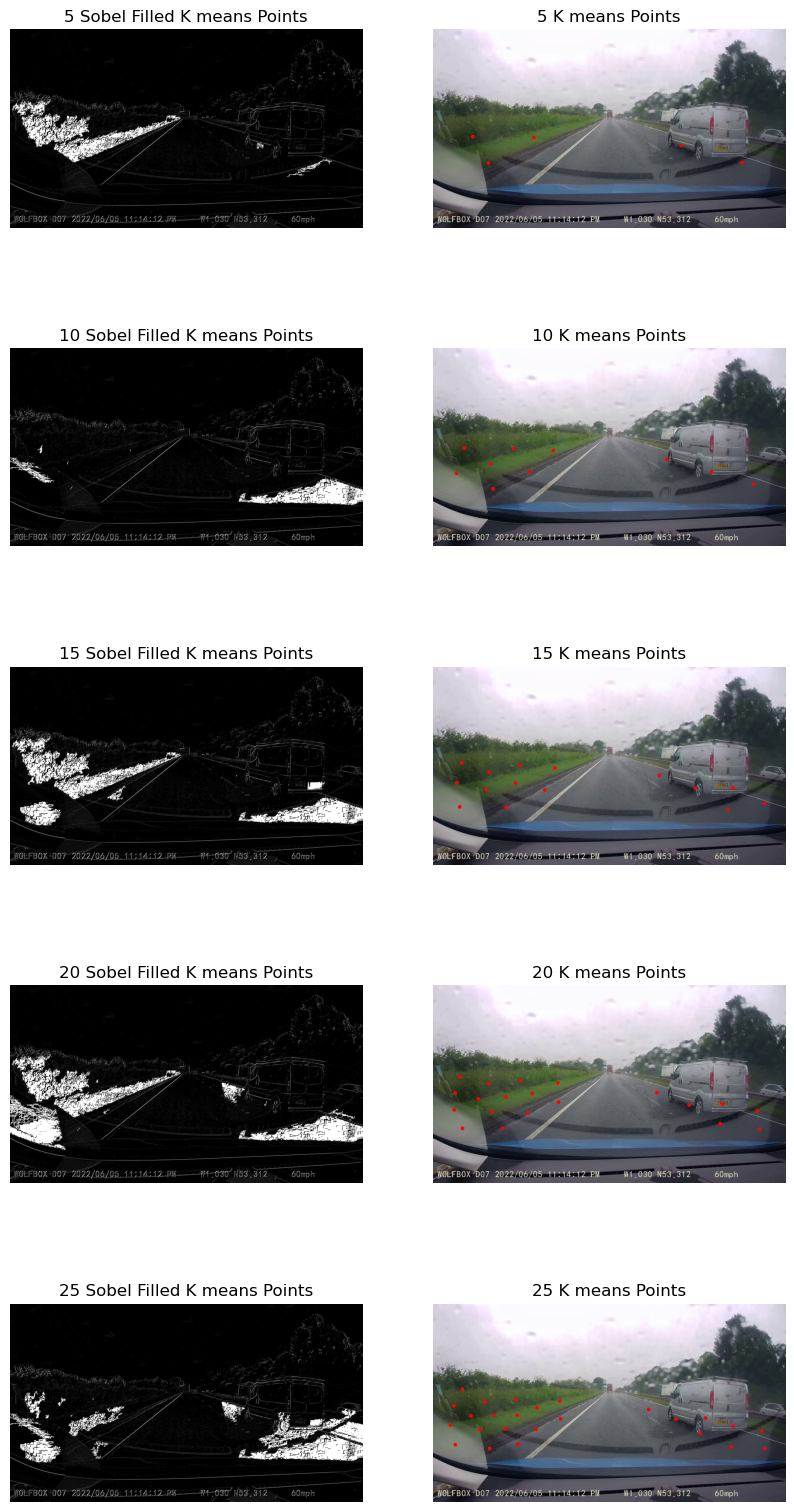

In [18]:
#with sobel filter
from skimage import filters
#Different K means values points
plt.figure(figsize=(10,20))

from sklearn.cluster import KMeans
import numpy as np
#unnormalised

def kmeans_fill(ks,tolerance):
    plt_counter = 1
    for i, k in enumerate(ks): 
        points = [(centx[j], centy[j]) for j in range(0, len(centx))]

        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(points)


        kCents = kmeans.cluster_centers_
        x,y = zip(*kCents)

        to_fill = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        to_fill = cv2.GaussianBlur(to_fill,(3,3), 0);

        grad_x = cv2.Sobel(to_fill,cv2.CV_16U,1,0,borderType=cv2.BORDER_DEFAULT)
        grad_y = cv2.Sobel(to_fill,cv2.CV_16U,0,1,borderType=cv2.BORDER_DEFAULT)

        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)

        grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

      
        for j in range(0,len(x)):
            grad = grad.copy()
            grad = flood_fill(grad,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=tolerance)
        
        
        
        
        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} Sobel Filled K means Points")
        plt.imshow(grad,cmap = "gray")
        
        plt_counter += 1
        #plot clustered points
        plotted_im = im.copy()
        for j in range(0,len(x)):
            cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


        plt.subplot(len(ks),2,plt_counter)
        plt.axis("off")
        plt.title(f"{k} K means Points")
        plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))
        plt_counter += 1
        
kmeans_fill([5,10,15,20,25],1.5) #k's to test followed by fill tolerance

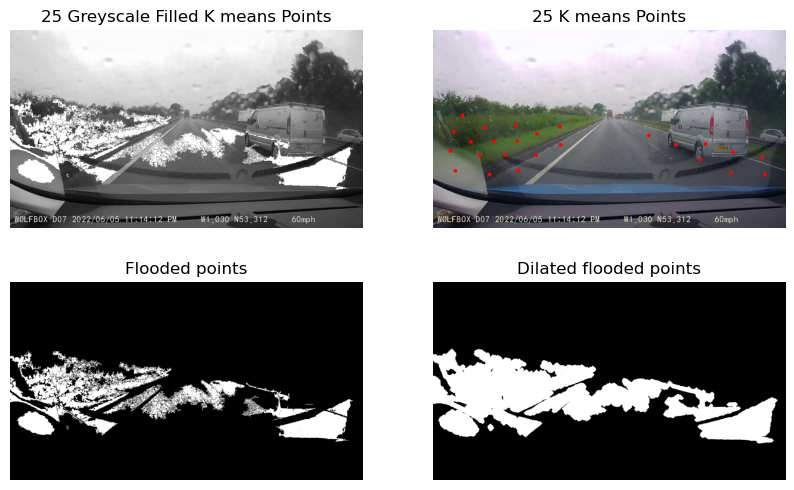

In [19]:
#Create better mask from best result

from skimage import morphology
#(25-K, 7 tolerance)
plt.figure(figsize=(10,6))

#get all litter points as tuple
points = [(centx[j], centy[j]) for j in range(0, len(centx))]

#perform k-means to reduce 
kmeans = KMeans(n_clusters=25, random_state=0, n_init=10).fit(points)


kCents = kmeans.cluster_centers_
x,y = zip(*kCents) #disconnect points from tuple


#convert image to greyscale
to_fill = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#create placeholder blank verges image
verges = np.zeros(to_fill.shape)

#flood region at every point
for j in range(0,len(x)):
    to_fill = to_fill.copy()
    to_fill = flood_fill(to_fill,(int(y[j]*1080),int(x[j]*1920)),255,tolerance=7) #Just for Visualising flooding
    f = flood(to_fill,(int(y[j]*1080),int(x[j]*1920)),tolerance=7) # add 260 (not in image pixel amount)
    verges += f #add flooded region to verges

verges[verges != 0] = 1 #normalise verges image [Binarise] (pixels may add due to flood additions)

plt.subplot(2,2,1)
plt.axis("off")
plt.title("25 Greyscale Filled K means Points")
plt.imshow(to_fill,cmap = "gray")


#plot clustered points
plotted_im = im.copy()
for j in range(0,len(x)):
    cv2.circle(plotted_im, (int(x[j]*1920),int(y[j]*1080)), radius=10, color=(0, 0, 255), thickness=-1)


plt.subplot(2,2,2)
plt.axis("off")
plt.title("25 K means Points")
plt.imshow(cv2.cvtColor(plotted_im,cv2.COLOR_BGR2RGB))

plt.subplot(2,2,3)
plt.axis("off")
plt.title("Flooded points")
plt.imshow(verges, cmap = "gray")

plt.subplot(2,2,4)

#Dilate mask

kernel = morphology.disk(1)

img_dilation = cv2.dilate(verges, kernel, iterations=10)

plt.title("Dilated flooded points")
plt.axis("off")
plt.imshow(img_dilation, cmap = "gray")

In [20]:
#Now test for all Images (Then go back to other project and dilate instead of close)

#takes x and y centers from entire dataset
def reduce_points(centx,centy,k):
    points = [(centx[j], centy[j]) for j in range(0, len(centx))]

    #perform k-means to reduce 
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10).fit(points)


    kCents = kmeans.cluster_centers_
    x,y = zip(*kCents) #disconnect points from tuple
    
    return x,y

def flood_point_segment(bgr_image, kmpx,kmp_y, tolerance = 7):
    
    #convert image to greyscale
    to_fill = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    im_shape = to_fill.shape

    #create placeholder blank verges image
    verges = np.zeros(im_shape)

    #flood region at every point
    for j in range(0,len(kmpx)):
        to_fill = to_fill.copy()
        
        
        x1=int(kmpx[j]*im_shape[1])
        y1=int(kmp_y[j]*im_shape[0])
        
        fl = flood(to_fill,(y1,x1),tolerance=tolerance) # add 260 (not in image pixel amount)
        verges += fl #add flooded region to verges

    verges[verges != 0] = 1 #normalise verges image [Binarise] (pixels may add due to flood additions)




    kernel = morphology.disk(1)

    img_dilation = cv2.dilate(verges, kernel, iterations=10)

    
    return img_dilation

def evaluate_segment(seg,gt,prnt = False):
    seg = np.asarray(seg).astype(bool)
    gt = np.asarray(gt).astype(bool)
    intersection = np.logical_and(seg, gt)
    union = np.logical_or(seg, gt)
    
    #DICE
    dice = 2. * np.sum(intersection) / (np.sum(seg) + np.sum(gt))

    #IOU

    iou_score = np.sum(intersection) / np.sum(union)
    if prnt == True:
        print('IoU similarity score is {}'.format(iou_score))
        print('Dice similarity score is {}'.format(dice))
    return dice, iou_score

def format_gt(gt_mask_im):
    gt_mask = cv2.cvtColor(gt_mask_im, cv2.COLOR_BGR2GRAY)
    (thresh, gt_bw) = cv2.threshold(gt_mask, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)#convert mask to grayscale
    return gt_bw

IoU similarity score is 0.2577485487545007
Dice similarity score is 0.40985704020050595


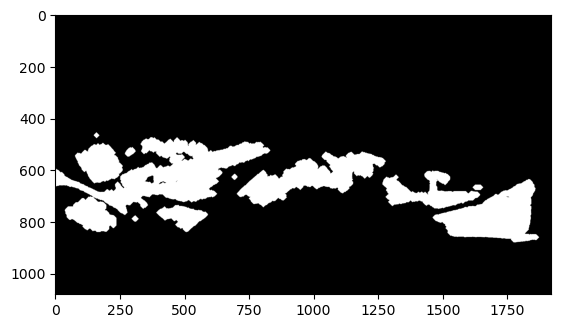

In [21]:
#Test Functions
x,y = reduce_points(centx,centy,25)

im = cv2.imread(samp1)
test = flood_point_segment(im,x,y,5)
plt.imshow(test, cmap = "gray")

gt_mask_p = os.path.join(masks,os.listdir(masks)[0])
gt_mask = cv2.imread(gt_mask_p)
m = format_gt(gt_mask)

(dice, iou_score) = evaluate_segment(test,m, True)

In [22]:
#Try over many K values (tolerance = 7)
ks = [5,10,15,20,15,20,25,30,35,40]

from tqdm import tqdm
#Perform over all dataset
samp_fs = os.listdir(samples)
mask_fs = os.listdir(masks)

medians = []
avs = []
for k in ks:
    ious = []
    dices = []

    x,y = reduce_points(centx,centy,k)

    for i in tqdm(range(0,len(samp_fs))):
        im_p = os.path.join(samples,samp_fs[i])
        gt_name = samp_fs[i].replace(".jpg",".png")

        gt_p = os.path.join(masks,gt_name)

        im = cv2.imread(im_p)

        #format full image

        flooded = flood_point_segment(im,x,y)

        #format mask
        gt_mask = cv2.imread(gt_p)
        m = format_gt(gt_mask)

        (dice, iou_score) = evaluate_segment(flooded,m)


        ious.append(iou_score)
        dices.append(dice)
        
        av_iou = np.mean(ious)
        median_iou = np.median(ious)
        std_iou = np.std(ious)
        
        
        av_dice = np.mean(dices)
        median_dice = np.median(dices)
        std_dice = np.std(dices)
    
    print("For k value of", k)
    print("Average IOU: ", av_iou)
    print("Median IOU:", median_iou)
    print("Std Dev IOU:", std_iou)
    
    print("Average Dice: ", av_dice)
    print("Median Dice:", median_dice)
    print("Std Dev Dice:", std_dice)
    
    medians.append(median_iou)
    avs.append(av_iou)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.38it/s]


For k value of 5
Average IOU:  0.1600654086082987
Median IOU: 0.1458328712700364
Std Dev IOU: 0.11071347197629514
Average Dice:  0.26080469275389195
Median Dice: 0.2542554435642781
Std Dev Dice: 0.15953606717328522


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  6.35it/s]


For k value of 10
Average IOU:  0.22388072440288737
Median IOU: 0.21728306266841707
Std Dev IOU: 0.12998707023265488
Average Dice:  0.34833406961166463
Median Dice: 0.35699600575151597
Std Dev Dice: 0.16659873062260278


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.54it/s]


For k value of 15
Average IOU:  0.24146711960369377
Median IOU: 0.24969500241497483
Std Dev IOU: 0.11332904790997074
Average Dice:  0.3757684794874515
Median Dice: 0.39960875353303527
Std Dev Dice: 0.14592657049120503


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.94it/s]


For k value of 20
Average IOU:  0.25703973097961386
Median IOU: 0.24421482600911176
Std Dev IOU: 0.12149711123524197
Average Dice:  0.3942652980662665
Median Dice: 0.3924932745715164
Std Dev Dice: 0.15291888924663086


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.54it/s]


For k value of 15
Average IOU:  0.24146711960369377
Median IOU: 0.24969500241497483
Std Dev IOU: 0.11332904790997074
Average Dice:  0.3757684794874515
Median Dice: 0.39960875353303527
Std Dev Dice: 0.14592657049120503


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.93it/s]


For k value of 20
Average IOU:  0.25703973097961386
Median IOU: 0.24421482600911176
Std Dev IOU: 0.12149711123524197
Average Dice:  0.3942652980662665
Median Dice: 0.3924932745715164
Std Dev Dice: 0.15291888924663086


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.42it/s]


For k value of 25
Average IOU:  0.2478429078925945
Median IOU: 0.23606839846766126
Std Dev IOU: 0.11497975460742184
Average Dice:  0.3840471255441636
Median Dice: 0.38195326673397
Std Dev Dice: 0.14375795249926449


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:10<00:00,  3.98it/s]


For k value of 30
Average IOU:  0.2573230916362806
Median IOU: 0.24986523408849304
Std Dev IOU: 0.10640048178146662
Average Dice:  0.39820543020991334
Median Dice: 0.3996832300901504
Std Dev Dice: 0.13187929247529512


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:10<00:00,  3.68it/s]


For k value of 35
Average IOU:  0.25331372638656
Median IOU: 0.2491992515307791
Std Dev IOU: 0.11160784245515899
Average Dice:  0.39179875290657207
Median Dice: 0.3989726840950251
Std Dev Dice: 0.14014741006049414


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.39it/s]

For k value of 40
Average IOU:  0.25269762498819787
Median IOU: 0.24476899683213116
Std Dev IOU: 0.1038317363074803
Average Dice:  0.3924598767527492
Median Dice: 0.3932628889580059
Std Dev Dice: 0.13301575285312647


Text(0, 0.5, 'Average IOU')

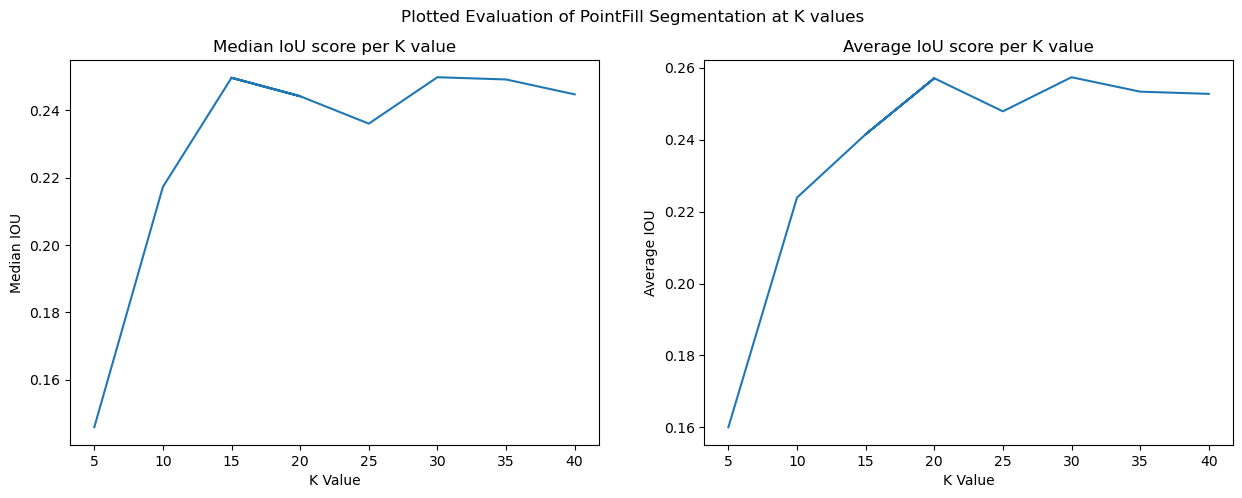

In [23]:
plt.figure(figsize = (15,5))
plt.suptitle("Plotted Evaluation of PointFill Segmentation at K values")

plt.subplot(1,2,1)
plt.plot(ks,medians)
plt.title("Median IoU score per K value")
plt.xlabel("K Value")
plt.ylabel("Median IOU")

plt.subplot(1,2,2)
plt.plot(ks,avs)
plt.title("Average IoU score per K value")
plt.xlabel("K Value")
plt.ylabel("Average IOU")

In [24]:
#Try over many tolerance values, k=20
tols = [1,2,3,4,5,6,7,8,9,10]

from tqdm import tqdm
#Perform over all dataset
samp_fs = os.listdir(samples)
mask_fs = os.listdir(masks)

medians = []
avs = []
for tol in tols:
    ious = []
    dices = []

    x,y = reduce_points(centx,centy,20)

    for i in tqdm(range(0,len(samp_fs))):
        im_p = os.path.join(samples,samp_fs[i])
        gt_name = samp_fs[i].replace(".jpg",".png")

        gt_p = os.path.join(masks,gt_name)

        im = cv2.imread(im_p)

        #format full image

        flooded = flood_point_segment(im,x,y,tol)

        #format mask
        gt_mask = cv2.imread(gt_p)
        m = format_gt(gt_mask)

        (dice, iou_score) = evaluate_segment(flooded,m)


        ious.append(iou_score)
        dices.append(dice)
        
        av_iou = np.mean(ious)
        median_iou = np.median(ious)
        std_iou = np.std(ious)
        
        
        av_dice = np.mean(dices)
        median_dice = np.median(dices)
        std_dice = np.std(dices)
    
    print("For k value of", k)
    print("Average IOU: ", av_iou)
    print("Median IOU:", median_iou)
    print("Std Dev IOU:", std_iou)
    
    print("Average Dice: ", av_dice)
    print("Median Dice:", median_dice)
    print("Std Dev Dice:", std_dice)
    
    medians.append(median_iou)
    avs.append(av_iou)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.21it/s]


For k value of 40
Average IOU:  0.09463890296107613
Median IOU: 0.06407060087588315
Std Dev IOU: 0.08193561312553206
Average Dice:  0.1637714397530076
Median Dice: 0.12042247619079233
Std Dev Dice: 0.12266756752473645


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.17it/s]


For k value of 40
Average IOU:  0.13856972739778123
Median IOU: 0.11597099857736562
Std Dev IOU: 0.09982255245464722
Average Dice:  0.2311386001582
Median Dice: 0.2078196606536204
Std Dev Dice: 0.14082472641408886


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.17it/s]


For k value of 40
Average IOU:  0.17549467217666223
Median IOU: 0.1663406275901093
Std Dev IOU: 0.10757190592451282
Average Dice:  0.2851013337943228
Median Dice: 0.28517361389394036
Std Dev Dice: 0.14853708630117568


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.15it/s]


For k value of 40
Average IOU:  0.20135105285530613
Median IOU: 0.193618057285577
Std Dev IOU: 0.11162974471115947
Average Dice:  0.32135889764588843
Median Dice: 0.32439485079465735
Std Dev Dice: 0.15025531197621067


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.09it/s]


For k value of 40
Average IOU:  0.22688518926776377
Median IOU: 0.21987398209118297
Std Dev IOU: 0.10973246502402947
Average Dice:  0.35704476283475894
Median Dice: 0.3604489530145193
Std Dev Dice: 0.14426118930433388


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.00it/s]


For k value of 40
Average IOU:  0.24546661769450234
Median IOU: 0.236317514713619
Std Dev IOU: 0.11621232705199575
Average Dice:  0.380335873208366
Median Dice: 0.38229241383808193
Std Dev Dice: 0.14923579324281683


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.89it/s]


For k value of 40
Average IOU:  0.25703973097961386
Median IOU: 0.24421482600911176
Std Dev IOU: 0.12149711123524197
Average Dice:  0.3942652980662665
Median Dice: 0.3924932745715164
Std Dev Dice: 0.15291888924663086


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  5.00it/s]


For k value of 40
Average IOU:  0.26119609388076953
Median IOU: 0.2604337534499285
Std Dev IOU: 0.12001688223868681
Average Dice:  0.40010964937743837
Median Dice: 0.41324382452668273
Std Dev Dice: 0.14895248432903668


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.93it/s]


For k value of 40
Average IOU:  0.25759974016639287
Median IOU: 0.23647463900619659
Std Dev IOU: 0.11827725952054902
Average Dice:  0.39587054820781586
Median Dice: 0.3824629463531578
Std Dev Dice: 0.1475399959746398


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.84it/s]

For k value of 40
Average IOU:  0.26345055038914944
Median IOU: 0.23939827736267513
Std Dev IOU: 0.11590372477443857
Average Dice:  0.4041347854543769
Median Dice: 0.3863131876115058
Std Dev Dice: 0.1412951261392254


Text(0, 0.5, 'Average IOU')

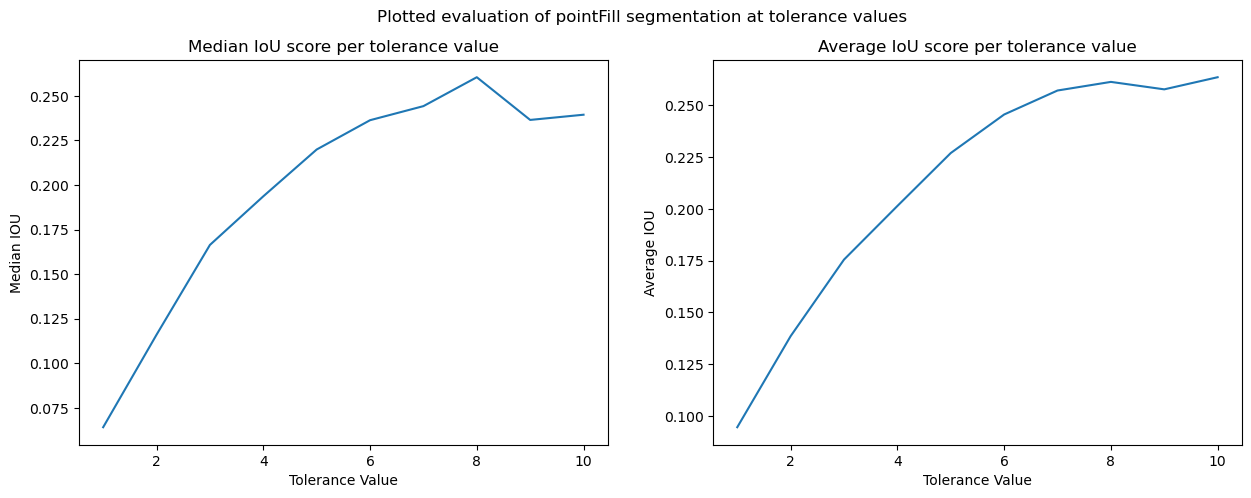

In [31]:
plt.figure(figsize = (15,5))
plt.suptitle("Plotted evaluation of pointFill segmentation at tolerance values")

plt.subplot(1,2,1)
plt.plot(tols,medians)
plt.title("Median IoU score per tolerance value")
plt.xlabel("Tolerance Value")
plt.ylabel("Median IOU")

plt.subplot(1,2,2)
plt.plot(tols,avs)
plt.title("Average IoU score per tolerance value")
plt.xlabel("Tolerance Value")
plt.ylabel("Average IOU")

In [26]:
from tqdm import tqdm
#Perform over all dataset with best parameters (k=20, tolerance=8)
samp_fs = os.listdir(samples)
mask_fs = os.listdir(masks)

ious = []
dices = []

x,y = reduce_points(centx,centy,20)

for i in tqdm(range(0,len(samp_fs))):
    im_p = os.path.join(samples,samp_fs[i])
    gt_name = samp_fs[i].replace(".jpg",".png")

    gt_p = os.path.join(masks,gt_name)
    
    im = cv2.imread(im_p)
    
    #format full image

    flooded = flood_point_segment(im,x,y,8)
    
    #format mask
    gt_mask = cv2.imread(gt_p)
    m = format_gt(gt_mask)

    (dice, iou_score) = evaluate_segment(flooded,m)
    

    ious.append(iou_score)
    dices.append(dice)
    
print("Average IOU: ", np.mean(ious))
print("Average Dice: ", np.mean(dices))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.02it/s]

Average IOU:  0.26119609388076953
Average Dice:  0.40010964937743837


<BarContainer object of 40 artists>

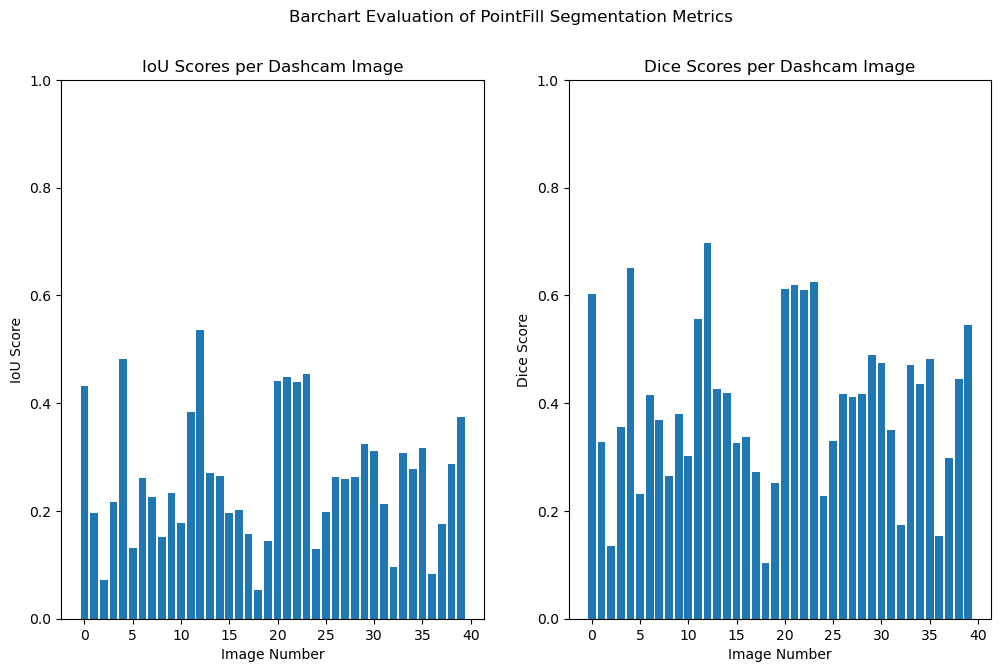

In [27]:
plt.figure(figsize=(12, 7))
h = range(0,len(ious))

plt.suptitle("Barchart Evaluation of PointFill Segmentation Metrics")

plt.subplot(1,2,1)
plt.title("IoU Scores per Dashcam Image")
plt.xlabel("Image Number")
plt.ylabel("IoU Score")
plt.ylim(0,1)
plt.bar(h,ious)

plt.subplot(1,2,2)
plt.title("Dice Scores per Dashcam Image")
plt.xlabel("Image Number")
plt.ylabel("Dice Score")
plt.ylim(0,1)
plt.bar(h,dices)

In [28]:
#Show Images where IoU is at a certain condition
import operator
def visualizeImageIOU(op, amount,figL):
    plt.figure(figsize=(10, figL))
    
    #recognise operator input
    ops = {'>': operator.gt,
               '<': operator.lt,
               '>=': operator.ge,
               '<=': operator.le,
               '==': operator.eq}
    
    x,y = reduce_points(centx,centy,20)

    n_dices = []
    indexs = []

    #find indexes
    for i, u in enumerate(ious):
        if ops[op](u,amount):
            indexs.append(i)

    pic_indexer = 1

    #Print their ground truth masks and relevant images
    for i in range(0,len(indexs)):
        im_p = os.path.join(samples,samp_fs[indexs[i]])
        gt_name = samp_fs[indexs[i]].replace(".jpg",".png")
        gt_p = os.path.join(masks,gt_name)

        im = cv2.imread(im_p)
        #format full image

        flooded = flood_point_segment(im,x,y,8)

        #format mask
        gt_mask = cv2.imread(gt_p)
        m = format_gt(gt_mask)

        plt.subplot(len(indexs),3,pic_indexer)
        plt.axis('off')
        plt.title(f"Image {indexs[i]}")
        plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

        pic_indexer+=1

        plt.subplot(len(indexs),3,pic_indexer)
        plt.axis('off')
        plt.title("Ground Truth Verge")
        plt.imshow(m,cmap = "gray")

        pic_indexer+=1

        plt.subplot(len(indexs),3,pic_indexer)
        plt.axis('off')
        plt.title("Predicted Verge")
        plt.imshow(flooded,cmap = "gray")

        pic_indexer+=1

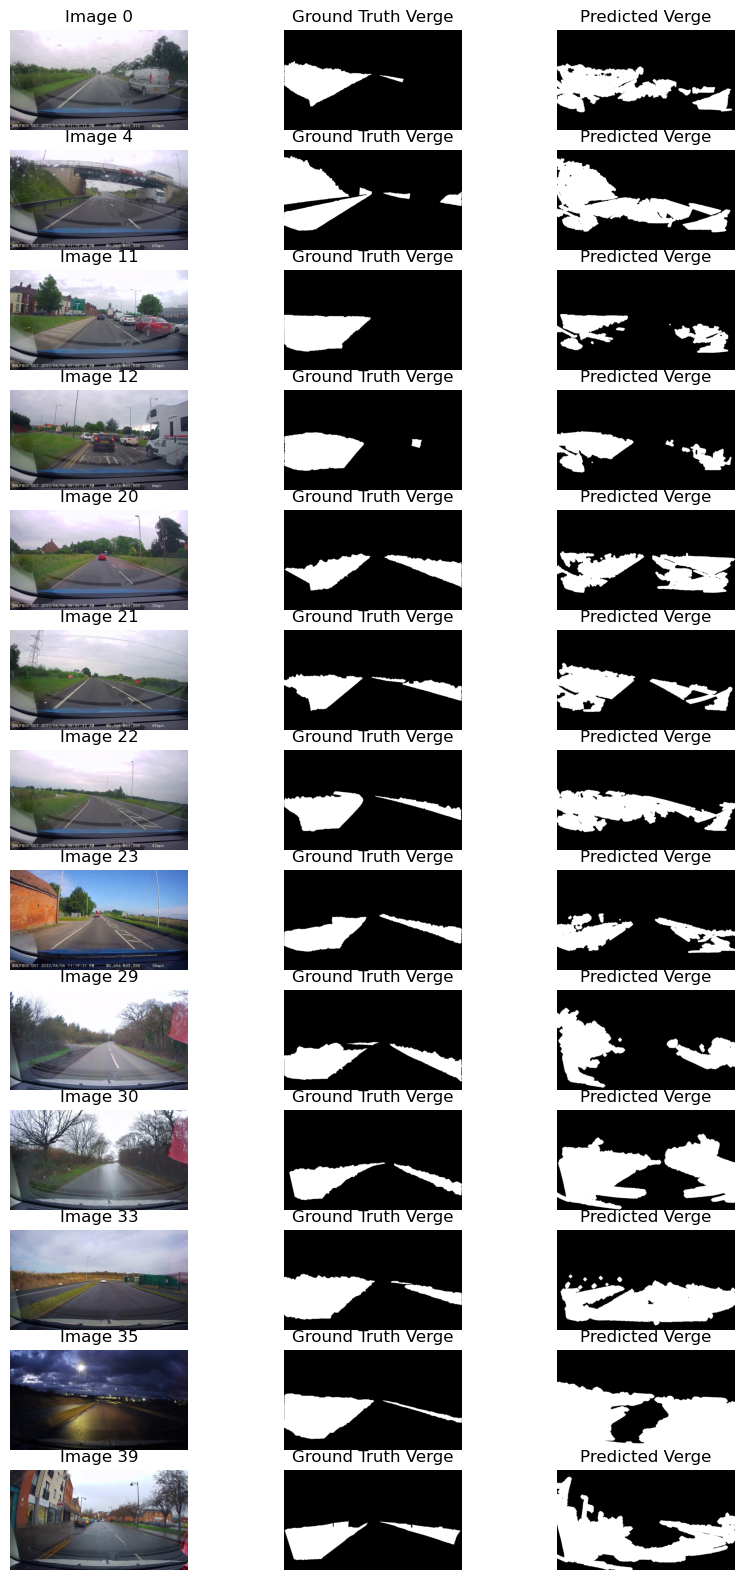

In [29]:
#Show Images where IoU is over 0.3 (Best)
visualizeImageIOU('>',0.3,20)

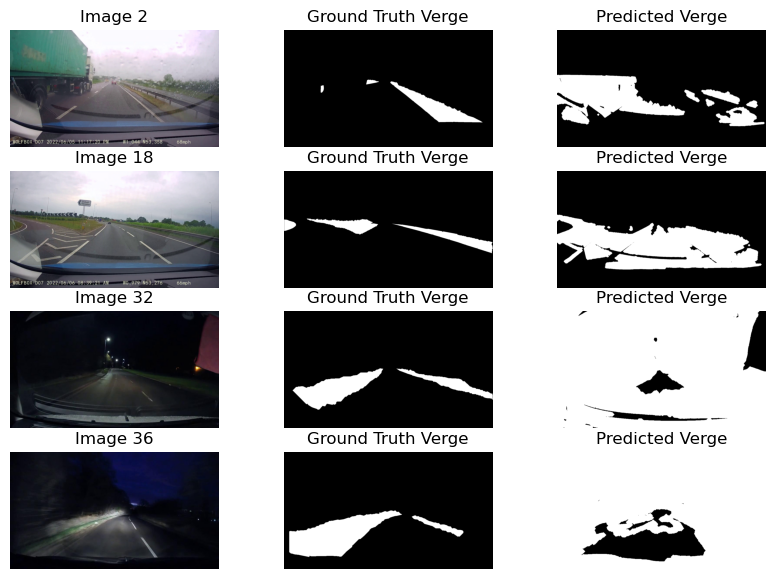

In [30]:
#Show Images where IoU is under 0.1 (worst)
visualizeImageIOU('<',0.1,7)